___
### Notebook 3 - Machine Learning Models
___

In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
# Clearing up memory
import gc

# Featuretools for automated feature engineering
import featuretools as ft
ft.__version__

'0.2.1'

In [86]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [87]:
df_kaggle = pd.read_csv('Cleaned_Application_Data.csv')
print(df_kaggle.shape)
desc = df_kaggle.describe(include='all').T
desc['percent_missing'] = (df_kaggle['TARGET'].size - desc['count'])*100/df_kaggle['TARGET'].size
desc = desc[desc['count']<df_kaggle['TARGET'].size][['count','percent_missing']]
print("Cleaned_Application_Data has {} columns with missing data out of total {} columns".format(desc.shape[0], 
      df_kaggle.columns.size))
df_kaggle.head()

(356255, 127)
Cleaned_Application_Data has 0 columns with missing data out of total 127 columns


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120         -1.0           1               1                0   
1             -291         -1.0           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437         -1.0           1               1                0   
4            -3458         -1.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

Above output suggests that there is no missing data in the df_kaggle dataset.

In [88]:
feature_matrix = pd.read_csv('feature_matrix_new.csv')
print(feature_matrix.shape)
feature_matrix.head()

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (866,1148,1222,1356,1594) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(356255, 1788)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100002         Cash loans           M            N               Y   
2      100003         Cash loans           F            N               N   
3      100004    Revolving loans           M            Y               Y   
4      100005         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0          202500.0    406597.5      24700.5         351000.0   
2             0          270000.0   1293502.5      35698.5        1129500.0   
3             0           67500.0    135000.0       6750.0         135000.0   
4             0           99000.0    222768.0      17370.0         180000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2          Family    State servant               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0               Married  House / apartment                    0.018850   
1  Single / not married  House / apartment                    0.018801   
2               Married  House / apartment                    0.003541   
3  Single / not married  House / apartment                    0.010032   
4               Married  House / apartment                    0.035792   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1       -9461           -637            -3648.0            -2120          NaN   
2      -16765          -1188            -1186.0             -291          NaN   
3      -19046           -225            -4260.0            -2531         26.0   
4      -18064          -4469            -9118.0            -1623          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           1   
2           1               1                0                 1           1   
3           1               1                1                 1           1   
4           1               1                0                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0            Laborers              1.0                     2   
2           0          Core staff              2.0                     1   
3           0            Laborers              1.0                     2   
4           0  Low-skill Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                  WEDNESDAY   
2                            1                     MONDAY   
3                            2                     MONDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                       10                           0   
2                       11                           0   
3                        9                           0   
4                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0 

In [89]:
# Check if there is any non-finite value in the application (df_kaggle) dataset
df_kaggle[df_kaggle.isin([np.inf, -np.inf]).any(1)].shape[0]

0

In [90]:
# Check if there is any non-finite value in the deep feature synthesized (feature_matrix) dataset
feature_matrix[feature_matrix.isin([np.inf, -np.inf]).any(1)].shape[0]

230

In [91]:
# Check if there is any non-finite value in the dataset
desc = feature_matrix.describe(include='all').T[['count','max']]
desc[desc.isin([np.inf, -np.inf]).any(1)]

count  max
MAX(credit_app.percent_credit_used)                 92447  inf
MEAN(credit_app.percent_credit_used)                92447  inf
MAX(prev_app.MEAN(credit_app.percent_credit_used))  92447  inf
MEAN(prev_app.MAX(credit_app.percent_credit_used))  92447  inf
MEAN(prev_app.MEAN(credit_app.percent_credit_us...  92447  inf

In the credit_app file, percent_credit_used field was added manually. 

<b>Formula used:Compute percent of credit used</b><br>
df_credit_onehot['percent_credit_used'] = np.round((df_credit_onehot.AMT_BALANCE/\
        df_credit_onehot.AMT_CREDIT_LIMIT_ACTUAL)*100, 2)
The values were infinite in the case when AMT_CREDIT_LIMIT_ACTUAL=0 and AMT_BALANCE>0

So in the case when the value is inf, we replaced it to zero for the fields percent_credit_used

In [92]:
feature_matrix.replace(to_replace=np.inf, value=0.0, inplace=True)

In [93]:
# recheck if there is any non-finite value in the dataset
desc = feature_matrix.describe(include='all').T[['count','max']]
desc[desc.isin([np.inf, -np.inf]).any(1)]

Empty DataFrame
Columns: [count, max]
Index: []

In [94]:
cols_df_kaggle = df_kaggle.columns
cols_df_kaggle = cols_df_kaggle.drop('SK_ID_CURR')
cols_feature_matrix = feature_matrix.columns
cols_common = list(set(cols_df_kaggle).intersection(cols_feature_matrix))

# Remove the columns from feature_matrix dataset that are present in both the datasets 
feature_matrix.drop(cols_common, axis=1, inplace=True)

In [95]:
feature_matrix.head()

SK_ID_CURR  SUM(bureau.DAYS_CREDIT)  SUM(bureau.CREDIT_DAY_OVERDUE)  \
0      100001                  -5145.0                             0.0   
1      100002                  -6992.0                             0.0   
2      100003                  -5603.0                             0.0   
3      100004                  -1734.0                             0.0   
4      100005                   -572.0                             0.0   

   SUM(bureau.DAYS_CREDIT_ENDDATE)  SUM(bureau.DAYS_ENDDATE_FACT)  \
0                            577.0                        -3302.0   
1                          -2094.0                        -4185.0   
2                          -2178.0                        -3292.0   
3                           -977.0                        -1065.0   
4                           1318.0                         -123.0   

   SUM(bureau.AMT_CREDIT_MAX_OVERDUE)  SUM(bureau.CNT_CREDIT_PROLONG)  \
0                               0.000                             0.0   
1                            8405.145                             0.0   
2                               0.000                             0.0   
3                               0.000                             0.0   
4                               0.000                             0.0   

   SUM(bureau.AMT_CREDIT_SUM)  SUM(bureau.AMT_CREDIT_SUM_DEBT)  \
0                 1453365.000                         596686.5   
1                  865055.565                         245781.0   
2                 1017400.500                              0.0   
3                  189037.800                              0.0   
4                  657126.000                         568408.5   

   SUM(bureau.AMT_CREDIT_SUM_LIMIT)  SUM(bureau.AMT_CREDIT_SUM_OVERDUE)  \
0                             0.000                                 0.0   
1                         31988.565                                 0.0   
2                        810000.000                                 0.0   
3                             0.000                                 0.0   
4                             0.000                                 0.0   

   SUM(bureau.DAYS_CREDIT_UPDATE)  SUM(bureau.AMT_ANNUITY_bureau)  \
0                          -652.0                         24817.5   
1                         -3999.0                             0.0   
2                         -3264.0                             0.0   
3                         -1064.0                             0.0   
4                          -163.0                          4261.5   

   SUM(bureau.0)  SUM(bureau.1)  SUM(bureau.2)  SUM(bureau.3)  SUM(bureau.4)  \
0           31.0            1.0            0.0            0.0            0.0   
1           45.0           27.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4           14.0            0.0            0.0            0.0            0.0   

   SUM(bureau.5)  SUM(bureau.C)  SUM(bureau.X)  SUM(bureau.AGE)  \
0            0.0            4.0           30.0            172.0   
1            0.0            6.0           15.0            110.0   
2            0.0            0.0            0.0              0.0   
3            0.0            0.0            0.0              0.0   
4            0.0            1.0            2.0             21.0   

   SUM(bureau.BUREAU_BAL_AVAILABLE)  SUM(bureau.CREDIT_ACTIVE_Active)  \
0                               7.0                               3.0   
1                               8.0                               2.0   
2                               0.0                               1.0   
3                               0.0                               0.0   
4                               3.0                               2.0   

   SUM(bureau.CREDIT_ACTIVE_Bad debt)  SUM(bureau.CREDIT_ACTIVE_Closed)  \
0                                 0.0      

In [96]:
feature_matrix.columns

Index(['SK_ID_CURR', 'SUM(bureau.DAYS_CREDIT)',
       'SUM(bureau.CREDIT_DAY_OVERDUE)', 'SUM(bureau.DAYS_CREDIT_ENDDATE)',
       'SUM(bureau.DAYS_ENDDATE_FACT)', 'SUM(bureau.AMT_CREDIT_MAX_OVERDUE)',
       'SUM(bureau.CNT_CREDIT_PROLONG)', 'SUM(bureau.AMT_CREDIT_SUM)',
       'SUM(bureau.AMT_CREDIT_SUM_DEBT)', 'SUM(bureau.AMT_CREDIT_SUM_LIMIT)',
       ...
       'MEAN(prev_app.MEAN(credit_app.AMT_TOTAL_RECEIVABLE_average))',
       'MEAN(prev_app.MEAN(credit_app.CNT_DRAWINGS_ATM_CURRENT_average))',
       'MEAN(prev_app.MEAN(credit_app.CNT_DRAWINGS_CURRENT_average))',
       'MEAN(prev_app.MEAN(credit_app.CNT_DRAWINGS_OTHER_CURRENT_average))',
       'MEAN(prev_app.MEAN(credit_app.CNT_DRAWINGS_POS_CURRENT_average))',
       'MEAN(prev_app.MEAN(credit_app.CNT_INSTALMENT_MATURE_CUM_average))',
       'MEAN(prev_app.MEAN(credit_app.SK_DPD_average))',
       'MEAN(prev_app.MEAN(credit_app.SK_DPD_DEF_average))',
       'MEAN(prev_app.MEAN(credit_app.SK_DPD_gt_0_rcd_count))',
       'MEA

In [97]:
# Merge the two dataset into a single dataset
df_kaggle = df_kaggle.merge(feature_matrix, on='SK_ID_CURR')
print(df_kaggle.shape)

(356255, 1793)


In [98]:
desc = df_kaggle.describe(include='all').T
desc['percent_missing'] = (df_kaggle['TARGET'].size - desc['count'])*100/df_kaggle['TARGET'].size
desc = desc[desc['count']<df_kaggle['TARGET'].size][['count','percent_missing']]
print("The combined dataset has {} columns with missing data out of total {} columns".format(desc.shape[0], 
      df_kaggle.columns.size))

The combined dataset has 1664 columns with missing data out of total 1793 columns


In [99]:
# Since the original df_kaggle dataset has no missing information and then when it was combined with the 
#   dataset obtained from deep feature synthesis process, some missing data was introduced.
# Since deep feature synthesis produced just max, min and mean data which means all the data is numeric
# Missing would mean that in the dataset using which the data was generated was not having data corresponding 
#   to the defined relationship between the application dataset and that file.
# So we can safely fill all the missing information in this dataset with zeros.
df_kaggle.fillna(0, inplace=True)

In [100]:
df_kaggle.dtypes[df_kaggle.dtypes=='object']

NAME_CONTRACT_TYPE                                    object
CODE_GENDER                                           object
FLAG_OWN_CAR                                          object
FLAG_OWN_REALTY                                       object
NAME_TYPE_SUITE                                       object
NAME_INCOME_TYPE                                      object
NAME_EDUCATION_TYPE                                   object
NAME_FAMILY_STATUS                                    object
NAME_HOUSING_TYPE                                     object
OCCUPATION_TYPE                                       object
WEEKDAY_APPR_PROCESS_START                            object
ORGANIZATION_TYPE                                     object
FONDKAPREMONT_MODE                                    object
HOUSETYPE_MODE                                        object
WALLSMATERIAL_MODE                                    object
EMERGENCYSTATE_MODE                                   object
FLAG_EXT_SOURCE_1       

In [101]:
# Some of the columns above were read as object but are float type. Change the datatype to correct datatype
cols = ['SUM(credit_app.percent_credit_used)', 'SUM(prev_app.MAX(credit_app.percent_credit_used))', 
        'SUM(prev_app.MEAN(credit_app.percent_credit_used))', 'MAX(prev_app.SUM(credit_app.percent_credit_used))', 
        'MEAN(prev_app.SUM(credit_app.percent_credit_used))']
df_kaggle[cols] = df_kaggle[cols].astype(float)

In [102]:
df_kaggle.dtypes[df_kaggle.dtypes=='object']

NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
ORGANIZATION_TYPE               object
FONDKAPREMONT_MODE              object
HOUSETYPE_MODE                  object
WALLSMATERIAL_MODE              object
EMERGENCYSTATE_MODE             object
FLAG_EXT_SOURCE_1               object
FLAG_EXT_SOURCE_2               object
FLAG_EXT_SOURCE_3               object
FLAG_SOCIAL_CIRCLE_AVAILABLE    object
FLAG_CREDIT_BUREAU_CHECK        object
dtype: object

In [103]:
# Perform one-hot encoding
df_kaggle_onehot = pd.get_dummies(df_kaggle)
print('Kaggle dataset shape before and after onehot', df_kaggle.shape, df_kaggle_onehot.shape)

Kaggle dataset shape before and after onehot (356255, 1793) (356255, 1925)


In [104]:
df_kaggle_onehot.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637            -3648.0            -2120         -1.0           1   
1          -1188            -1186.0             -291         -1.0           1   
2           -225            -4260.0            -2531         26.0           1   
3          -3039            -9833.0            -2437         -1.0           1   
4          -3038            -4311.0            -3458         -1.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246      0.000000          0.0959            0.0529   
2      0.000000      0.555912      0.729567          0.0000            0.0000   
3      0.000000      0.650442      0.000000          0.0000            0.0000   
4      0.000000      0.322738      0.000000          0.0000            0.0000   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

In [105]:
df_kaggle_onehot.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_EXT_SOURCE_1_N', 'FLAG_EXT_SOURCE_1_Y', 'FLAG_EXT_SOURCE_2_N',
       'FLAG_EXT_SOURCE_2_Y', 'FLAG_EXT_SOURCE_3_N', 'FLAG_EXT_SOURCE_3_Y',
       'FLAG_SOCIAL_CIRCLE_AVAILABLE_N', 'FLAG_SOCIAL_CIRCLE_AVAILABLE_Y',
       'FLAG_CREDIT_BUREAU_CHECK_N', 'FLAG_CREDIT_BUREAU_CHECK_Y'],
      dtype='object', length=1925)

In [106]:
desc = df_kaggle_onehot.describe(include='all').T

cols_having_both_pos_neg_values = desc[(desc['min']<0) &(desc['max']>0)].index.values

# remove TARGET variable from this list
cols_having_both_pos_neg_values = np.setdiff1d(cols_having_both_pos_neg_values, 'TARGET')

cols_having_only_neg_values = desc[(desc['min']<0) &(desc['max']<=0)].index.values

for col in cols_having_only_neg_values:
    df_kaggle_onehot[col] = df_kaggle_onehot[col].abs()

print('Kaggle dataset shape:', df_kaggle_onehot.shape)
min_val_list = []
cols_to_log_scale = desc[((desc['max'] - desc['min'])>100)].index.values
cols_to_log_scale = np.delete(cols_to_log_scale, np.where(cols_to_log_scale== 'SK_ID_CURR'))

for col in cols_to_log_scale:
    if col in cols_having_both_pos_neg_values:
        min_val_list.append(np.log(np.abs(df_kaggle_onehot[col].min())))
        df_kaggle_onehot[col+'_flag'] = np.where(df_kaggle_onehot[col]<0, -1, 1)
        # The value will start from 1
        df_kaggle_onehot[col] = np.log(df_kaggle_onehot[col] - df_kaggle_onehot[col].min() + 1)
    else:
        df_kaggle_onehot[col] = np.log(df_kaggle_onehot[col] + 1)
    
cols_having_both_pos_neg_values = np.intersect1d(cols_having_both_pos_neg_values, cols_to_log_scale)
for col, val in zip(cols_having_both_pos_neg_values, min_val_list):
    df_kaggle_onehot[col] = df_kaggle_onehot[col] * df_kaggle_onehot[col+'_flag']

df_kaggle_onehot.drop(columns= cols_having_both_pos_neg_values + '_flag', axis=1, inplace=True)
print('Kaggle dataset shape:', df_kaggle_onehot.shape)

Kaggle dataset shape: (356255, 1925)
Kaggle dataset shape: (356255, 1925)


In [107]:
desc1 = df_kaggle_onehot.describe(include='all').T
desc[['max','min']].join(desc1[['max','min']], lsuffix='_old', rsuffix='_new')

max_old  \
SK_ID_CURR                                          4.562550e+05   
TARGET                                              1.000000e+00   
CNT_CHILDREN                                        2.000000e+01   
AMT_INCOME_TOTAL                                    1.170000e+08   
AMT_CREDIT                                          4.050000e+06   
AMT_ANNUITY                                         2.580255e+05   
AMT_GOODS_PRICE                                     4.050000e+06   
REGION_POPULATION_RELATIVE                          7.250800e-02   
DAYS_BIRTH                                         -7.338000e+03   
DAYS_EMPLOYED                                       0.000000e+00   
DAYS_REGISTRATION                                   0.000000e+00   
DAYS_ID_PUBLISH                                     0.000000e+00   
OWN_CAR_AGE                                         9.100000e+01   
FLAG_MOBIL                                          1.000000e+00   
FLAG_EMP_PHONE                                      1.000000e+00   
FLAG_WORK_PHONE                                     1.000000e+00   
FLAG_CONT_MOBILE                                    1.000000e+00   
FLAG_PHONE                                          1.000000e+00   
FLAG_EMAIL                                          1.000000e+00   
CNT_FAM_MEMBERS                                     2.100000e+01   
REGION_RATING_CLIENT                                3.000000e+00   
REGION_RATING_CLIENT_W_CITY                         3.000000e+00   
HOUR_APPR_PROCESS_START                             2.300000e+01   
REG_REGION_NOT_LIVE_REGION                          1.000000e+00   
REG_REGION_NOT_WORK_REGION                          1.000000e+00   
LIVE_REGION_NOT_WORK_REGION                         1.000000e+00   
REG_CITY_NOT_LIVE_CITY                              1.000000e+00   
REG_CITY_NOT_WORK_CITY                              1.000000e+00   
LIVE_CITY_NOT_WORK_CITY                             1.000000e+00   
EXT_SOURCE_1                                        9.626928e-01   
EXT_SOURCE_2                                        8.549997e-01   
EXT_SOURCE_3                                        8.960095e-01   
APARTMENTS_AVG                                      1.000000e+00   
BASEMENTAREA_AVG                                    1.000000e+00   
YEARS_BEGINEXPLUATATION_AVG                         1.000000e+00   
YEARS_BUILD_AVG                                     1.000000e+00   
COMMONAREA_AVG                                      1.000000e+00   
ELEVATORS_AVG                                       1.000000e+00   
ENTRANCES_AVG                                       1.000000e+00   
FLOORSMAX_AVG                                       1.000000e+00   
FLOORSMIN_AVG                                       1.000000e+00   
LANDAREA_AVG                                        1.000000e+00   
LIVINGAPARTMENTS_AVG                                1.000000e+00   
LIVINGAREA_AVG                                      1.000000e+00   
NONLIVINGAPARTMENTS_AVG                             1.000000e+00   
NONLIVINGAREA_AVG                                   1.000000e+00   
APARTMENTS_MODE                                     1.000000e+00   
BASEMENTAREA_MODE                                   1.000000e+00   
YEARS_BEGINEXPLUATATION_MODE                        1.000000e+00   
YEARS_BUILD_MODE                                    1.000000e+00   
COMMONAREA_MODE                                     1.000000e+00   
ELEVATORS_MODE                                      1.000000e+00   
ENTRANCES_MODE                                      1.000000e+00   
FLOORSMAX_MODE                                      1.000000e+00   
FLOORSMIN_MODE                                      1.000000e+00   
LANDAREA_MODE                                       1.000000e+00   
LIVINGAPARTMENTS_MODE                               1.000000e+00   
LIVINGAREA_MODE                                     1.000000e+00   
NONLIVINGAPARTMENTS_MODE                     

In [108]:
df_kaggle_onehot.to_pickle('df_kaggle_onehot')

In [30]:
# Separate the Kaggle train and kaggle test datasets from df_kaggle dataset
df_kaggle_train = df_kaggle_onehot[df_kaggle_onehot.TARGET !=- 1]
df_kaggle_test = df_kaggle_onehot[df_kaggle_onehot.TARGET == -1]
print(df_kaggle_train.shape, df_kaggle_test.shape)

(307511, 1925) (48744, 1925)


In [31]:
df_kaggle_train = df_kaggle_train.apply(lambda x: pd.to_numeric(x,errors='ignore'))
df_kaggle_test = df_kaggle_test.apply(lambda x: pd.to_numeric(x,errors='ignore'))

In [32]:
df_kaggle_test.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307511      100001      -1             0         11.813037   13.251286   
307512      100005      -1             0         11.502885   12.313891   
307513      100013      -1             0         12.218500   13.404930   
307514      100028      -1             2         12.660331   14.269766   
307515      100038      -1             1         12.100718   13.346308   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
307511     9.931176        13.017005                    0.018850    9.864851   
307512     9.762557        12.100718                    0.035792    9.801732   
307513    11.153074        13.353477                    0.019101    9.905436   
307514    10.799973        14.269766                    0.026392    9.545168   
307515    10.375614        13.346308                    0.010032    9.475854   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
307511       7.753624           8.550821         6.700731         -1.0   
307512       8.405144           9.118115         7.392648         -1.0   
307513       8.402680           7.685244         8.161660          5.0   
307514       7.532088           7.601402         8.344980         -1.0   
307515       7.692570           8.294300         8.357728         16.0   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
307511           1               1                0                 1   
307512           1               1                0                 1   
307513           1               1                0                 1   
307514           1               1                0                 1   
307515           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307511           0           1              2.0                     2   
307512           0           0              2.0                     2   
307513           0           0              2.0                     2   
307514           1           0              4.0                     2   
307515           0           0              3.0                     2   

        REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
307511                            2                       18   
307512                            2                        9   
307513                            2                       14   
307514                            2                       11   
307515                            2                        5   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
307511                           0                           0   
307512                           0                           0   
307513                           0                           0   
307514                           0                           0   
307515                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
307511                            0                       0   
307512                            0                       0   
307513                            0                       0   
307514                            0                       0   
307515                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
307511                       0                        0      0.752614   
307512                       0                        0      0.564990   
307513                       0                        0      0.000000   
307514                       0                        0      0.525734   
307515                       1                        1      0.202145   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
307511      0.789654      0.159520          0.0660            0.0590   
307512      0.2

In [35]:
# import sys
# for var, obj in locals().items():
#     print(var, sys.getsizeof(obj))

In [33]:
print('Clearing up memory')

gc.enable()
# Clear up memory
del df_kaggle, desc, feature_matrix, df_kaggle_onehot
gc.collect() # Request garbage collector to execute

Clearing up memory


14

In [34]:
df_kaggle_train[df_kaggle_train.isin([np.inf, -np.inf, np.NaN]).any(1)].shape[0]

0

# Dataset Preprocessing before Data Modelling
* Standard scalar method
* Min Max Scalar
* Max Mean Scalar

In [55]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedShuffleSplit

# For PCA and scalar transfer, since missing values cause errors, fill missing values with 0 in the dataset
df_kaggle_train.fillna(0, inplace=True)

# Separate dependent and response variables
Y = df_kaggle_train.TARGET.values
Y = Y.reshape((Y.size, 1))
X = df_kaggle_train.drop(['TARGET', 'SK_ID_CURR'], axis=1).values
X_test_kaggle = df_kaggle_test.drop(['TARGET', 'SK_ID_CURR'], axis=1).values
norm_model = Normalizer()
X_norm = norm_model.fit_transform(X)

X_test_kaggle_norm = norm_model.transform(X_test_kaggle)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
for train_index, test_index in sss.split(X, Y):
    sub_sample_index = train_index

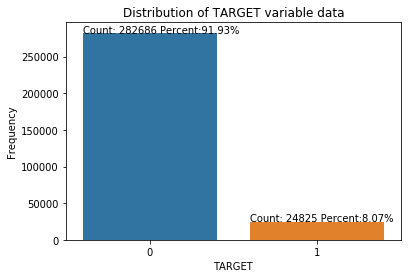

In [36]:
import seaborn as sns
# sns.countplot(data=df_kaggle_train, x='TARGET')
ax = sns.countplot(data=df_kaggle_train , x="TARGET")
ax.set(ylabel="Frequency")
for p in ax.patches:
        ax.annotate('Count: {:.0f}'.format(p.get_height()) + ' Percent:' + '{:.2f}%'.format(p.get_height()/df_kaggle_train['TARGET'].size * 100),
                    (p.get_x(), p.get_height()+50))
ax.set_title("Distribution of TARGET variable data")
plt.show()

In [ ]:
features = df_kaggle_train.drop(['TARGET', 'SK_ID_CURR'], axis=1).columns.values

The above figure suggests that the dataset is highly imbalanced which is very crutial information to keep in mind before building the models.

# Dimension reduction
## PCA

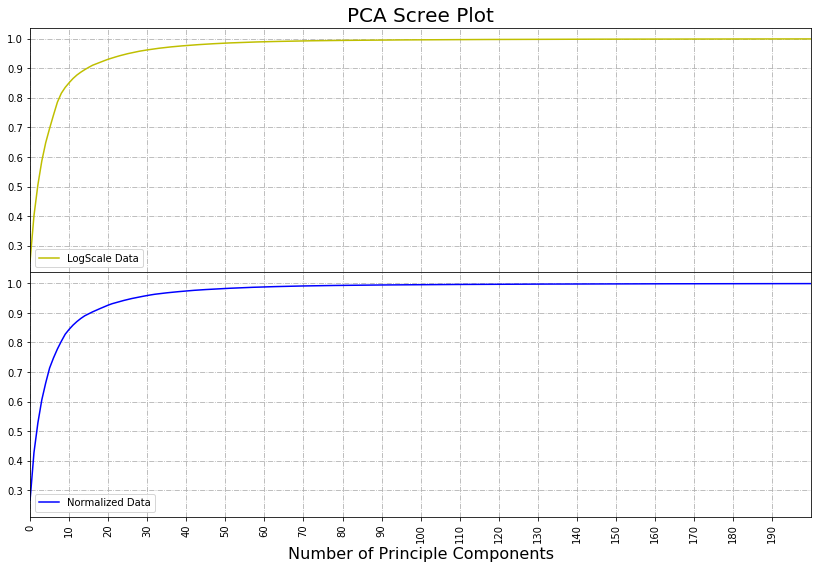

In [43]:
from sklearn.decomposition import PCA
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True, figsize=(14, 9))

plt.xlim((0,200))
plt.xticks(np.arange(0, 200, 10), rotation=90)
plt.xlabel('Number of Principle Components', fontsize=16)
pca=PCA()
pca.fit(X[train_index])
ax1.grid(linestyle='-.')
ax1.plot(np.cumsum(pca.explained_variance_ratio_), 'y-', label='LogScale Data');
ax1.legend(loc="lower left")
pca_std = PCA()
pca_std.fit(X_norm[train_index])
ax2.grid(linestyle='-.')
ax2.plot(np.cumsum(pca_std.explained_variance_ratio_), 'b-', label='Normalized Data');
ax2.legend(loc="lower left")
ax1.set_title('PCA Scree Plot', fontsize=20)
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

From above figure, we choose 8 PCA components for unscaled data, 110 PCA components for StandardScalar and 35 PCA components for both MinMaxScalar and MaxAbsScalar. This choice was made to choose number of principle components that could explain 80% of the variance in the dataset.

# Classification evaluation function

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy
import pandas as pd
import itertools

def classification_evaluation(y_actual, y_prediction, y_prediction_prob, pr_roc_ind=1):
    """
    Implementation of classification_evaluation which is for implementaion of creation of confusion matrix and 
    ROC/PR curve.
        
    Arguments:
    y_actual -- Actual values of the variable to be predicted
    y_prediction -- Predicted values of the variable to be predicted
    y_prediction_prob -- Prediction probabilities with predicted values of the variable to be predicted
    pr_roc_ind -- Indicator to determine whether to create PR curve or ROC curve. If 1 then PR curve else ROC curve.
       
    Returns:
    """
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_actual, y_prediction)
    np.set_printoptions(precision=2)
    print("Detailed classification report:\n")
    print(classification_report(y_actual, y_prediction))
    print('Accuracy:', accuracy_score(y_actual, y_prediction))
    print('Weighted F1 score:', f1_score(y_actual, y_prediction, average='weighted'))
    
    fig, ax = plt.subplots(1,2, figsize=(14, 6))
    # Plot confusion matrix
    ax[0] = plot_confusion_matrix(cnf_matrix, classes=[0,1], threshold=0.5, plt_axis=ax[0])
    ax[0].set_title('Confusion Matrix')

    if pr_roc_ind==1:
        # calculate the fpr and tpr for all thresholds of the classification
        precision, recall, threshold = precision_recall_curve(y_actual, y_prediction_prob[:,1])
        # Plot PR Curve    
        ax[1] = plot_precision_recall_curve(precision, recall, plt_axis=ax[1])
        average_precision = average_precision_score(y_actual, y_prediction)
        ax[1].set_title("PR Curve:Average precision-recall score: {0:0.2f}".format(average_precision) )
    
    else:
        # calculate the fpr and tpr for all thresholds of the classification
        fpr, tpr, threshold = roc_curve(y_actual, y_prediction_prob[:,1])
        # Plot ROC Curve    
        ax[1] = plot_roc_curve(fpr, tpr, plt_axis=ax[1])
        ax[1].set_title("ROC Curve")
    
    plt.subplots_adjust( wspace=0.2)
    plt.show()
    
def plot_confusion_matrix(cm, classes, plt_axis, 
                          threshold = 0,
                          cmap=plt.cm.Blues ):
    """
    This function prints and plots the confusion matrix.
    """
    cm1 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.sca(plt_axis)
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' 
    thresh = cm1.max() / 4 if threshold==0 else threshold
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt_axis.text(j, i, format(cm[i, j], fmt)+'\nNormalized:' + format(cm1[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm1[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt_axis

def plot_roc_curve(fpr, tpr, plt_axis):
    roc_auc = auc(fpr, tpr) # Area under curve
    plt.sca(plt_axis)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt_axis

def plot_precision_recall_curve(precision, recall, plt_axis):
    pr_auc = auc(recall, precision) # Area under curve
    plt.sca(plt_axis)
    plt.step(recall, precision, color='b', alpha=0.2, where='post', label = 'AUC = %0.2f' % pr_auc)
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.legend(loc = 'lower right')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    return plt_axis

In [51]:
# df_kaggle_test.to_csv()
def generate_kaggle_output(model, test_data, df_test_SK_ID, csv_file_name):
    df_test_SK_ID['TARGET']= model.predict(test_data)
    df_test_SK_ID.to_csv(index=False, path_or_buf = 'output/' + csv_file_name + '.csv')

# Logestic Regression With PCA
<b>1. Input dataset (Log scaled) </b>


Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.94      0.61      0.74     56538
          1       0.12      0.58      0.19      4965

avg / total       0.88      0.61      0.70     61503

Accuracy: 0.6117425166252053
Weighted F1 score: 0.699865824246498


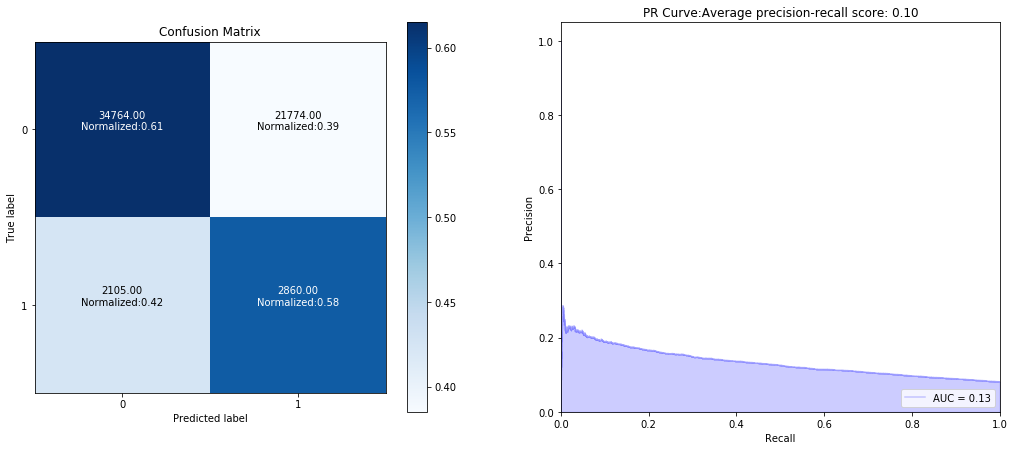

Execution time:  138.88748800000008  seconds


In [58]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
import time

start_time = time.clock()

pca = PCA(n_components=20)
# Logistic regression with balanced class_weight as the dataset is highly imbalanced
cls = LogisticRegression(class_weight='balanced') 

pipe = Pipeline([('pca', pca), ('logistic', cls)])


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X, Y):
    X_train = X[train_index]
    Y_train = Y[train_index]
    X_test = X[test_index]
    Y_test = Y[test_index]
    pipe.fit(X_train, Y_train.ravel())
    predictions = pipe.predict(X_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_test)
    print("Cross Validation Execution : ", count)
    count = count + 1
    classification_evaluation(Y_test, predictions, pred_prob)
print("Execution time: ", time.clock() - start_time, " seconds")

In [59]:
generate_kaggle_output(cls, pca.transform(X_test_kaggle),
                       pd.DataFrame(df_kaggle_test.SK_ID_CURR), "LogesticReg_PCA" )

<b>2. Normalized Input dataset</b>


Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.94      0.61      0.74     56538
          1       0.12      0.58      0.19      4965

avg / total       0.88      0.61      0.70     61503

Accuracy: 0.609417426792189
Weighted F1 score: 0.6980034025774073


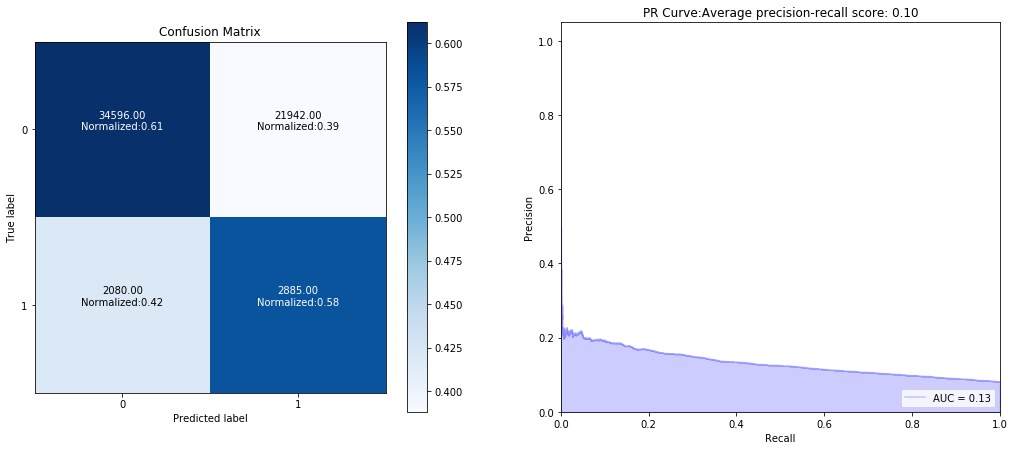

Execution time:  125.23906899999997  seconds


In [60]:
start_time = time.clock()

pca = PCA(n_components=20)
# Logestic regression with balanced class_weight as the dataset is highly imbalanced
cls_norm = LogisticRegression(class_weight='balanced') 

pipe = Pipeline([('pca', pca), ('logistic', cls_norm)])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_norm, Y):
    X_train = X_norm[train_index]
    Y_train = Y[train_index]
    X_test = X_norm[test_index]
    Y_test = Y[test_index]
    pipe.fit(X_train, Y_train.ravel())
    predictions = pipe.predict(X_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_test)
    print("Cross Validation Execution : ", count)
    count = count + 1
    classification_evaluation(Y_test, predictions, pred_prob)
print("Execution time: ", time.clock() - start_time, " seconds")

In [61]:
generate_kaggle_output(cls_norm, pca.transform(X_test_kaggle_norm),
                       pd.DataFrame(df_kaggle_test.SK_ID_CURR), "norm_LogesticReg_PCA" )

# Unsupervised Neural network model
## BernoulliRBM feature extractor and a LogisticRegression classifier
Restricted Boltzmann machines (RBM) are unsupervised nonlinear feature learners based on a probabilistic model. BernoulliRBM assumes the inputs are either binary values or values between 0 and 1, each encoding the probability that the specific feature would be turned on. So here we will be using scaled dataset only. RBM tries to maximize the likelihood of the data using a particular graphical model. The parameter learning algorithm used (Stochastic Maximum Likelihood) prevents the representations from straying far from the input data, which makes them capture interesting regularities, but makes the model less useful for small datasets, and usually not useful for density estimation. Since we have a decent dataset, BernoulliRBM may be a tryworthy algorithm to implement. 

In [62]:
# Pick the best rbm model from other notebook and 
#     apply a few different classification algorithms on the features learned by RBM
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import Normalizer

# X_norm = Normalizer().fit_transform(X)
rbm_norm = BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=10, random_state=0, verbose=True)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -46.04, time = 115.80s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -45.03, time = 135.44s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -35.14, time = 132.39s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -41.88, time = 131.35s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -41.49, time = 131.97s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -38.59, time = 131.53s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -36.82, time = 132.07s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -38.05, time = 131.94s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -37.20, time = 133.37s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -33.93, time = 131.91s
Normalized Data - RBM + Logestic Regression Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      0.08      0.15     56538
          1       0.08      0.92      0.15      4965

avg / total       

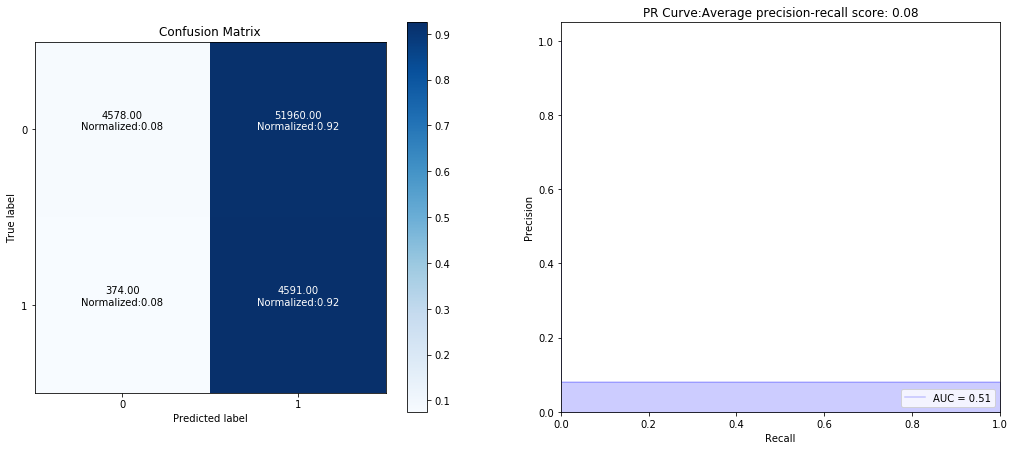

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Normalized Data - RBM + QCA Cross Validation Execution :  2
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.00      0.00     56538
          1       0.08      1.00      0.15      4965

avg / total       0.86      0.08      0.01     61503

Accuracy: 0.0818334065004959
Weighted F1 score: 0.01446326873834579


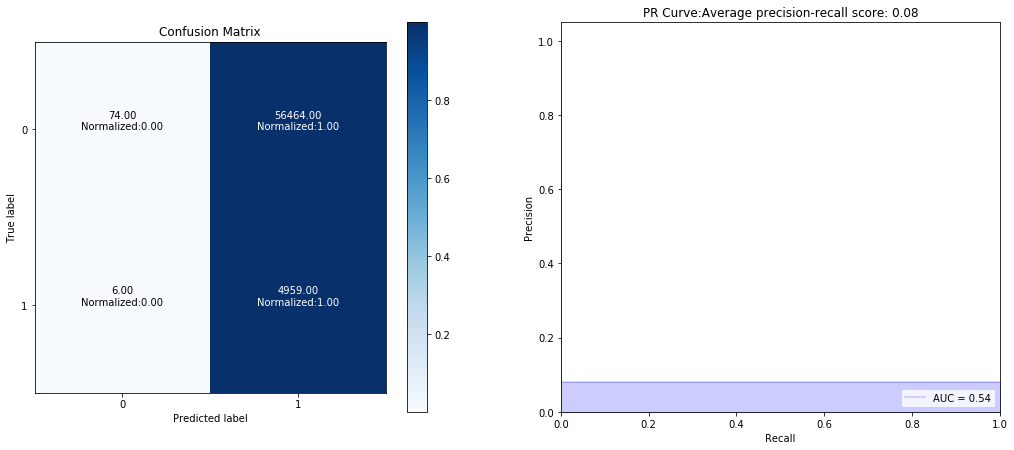

NameError: name 'logestic' is not defined

In [63]:
logistic = LogisticRegression(penalty='l2', class_weight='balanced')
qca = QuadraticDiscriminantAnalysis(priors=[ 0.9, 0.1])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_norm, Y):
    X_train = X_norm[train_index]
    Y_train = Y[train_index]
    X_test = X_norm[test_index]
    Y_test = Y[test_index]
    logistic.fit(rbm_norm.fit_transform(X_train), Y_train.ravel())
    y_pred = logistic.predict(rbm_norm.transform(X_test))
    pred_prob = logistic.predict_proba(rbm_norm.transform(X_test))
    print("Normalized Data - RBM + Logestic Regression Cross Validation Execution : ", count)
    count = count + 1
    classification_evaluation(Y_test, y_pred, pred_prob)
    qca.fit(rbm_norm.transform(X_train), Y_train.ravel())
    y_pred = qca.predict(rbm_norm.transform(X_test))
    pred_prob = qca.predict_proba(rbm_norm.transform(X_test))
    print("Normalized Data - RBM + QCA Cross Validation Execution : ", count)
    count = count + 1
    classification_evaluation(Y_test, y_pred, pred_prob)

In [64]:
generate_kaggle_output(logistic, rbm_norm.transform(X_test_kaggle_norm),
                       pd.DataFrame(df_kaggle_test.SK_ID_CURR), "LogesticReg_RBM" )
generate_kaggle_output(qca, rbm_norm.transform(X_test_kaggle_norm),
                       pd.DataFrame(df_kaggle_test.SK_ID_CURR), "QCA_RBM" )

In [77]:
def feature_imp_plot(model, model_name, title, features):
    x, y = (list(x) for x in zip(*sorted(zip(model.feature_importances_, features), 
                                                            reverse = False)))
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    tot = 0
    plt.figure()
    plt.title(title)
    
    plt.bar(range(np.shape(x)[0]), importances[indices],
       color="r", yerr=std[indices], align="center")
    plt.xticks(range(np.shape(x)[0]), indices)
    plt.xlim([-1, np.shape(x)[0]])
    plt.show()

Log sampled Data - Random Forest Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     56538
          1       0.30      0.01      0.02      4965

avg / total       0.87      0.92      0.88     61503

Accuracy: 0.9181340747605807
Weighted F1 score: 0.881696994351818


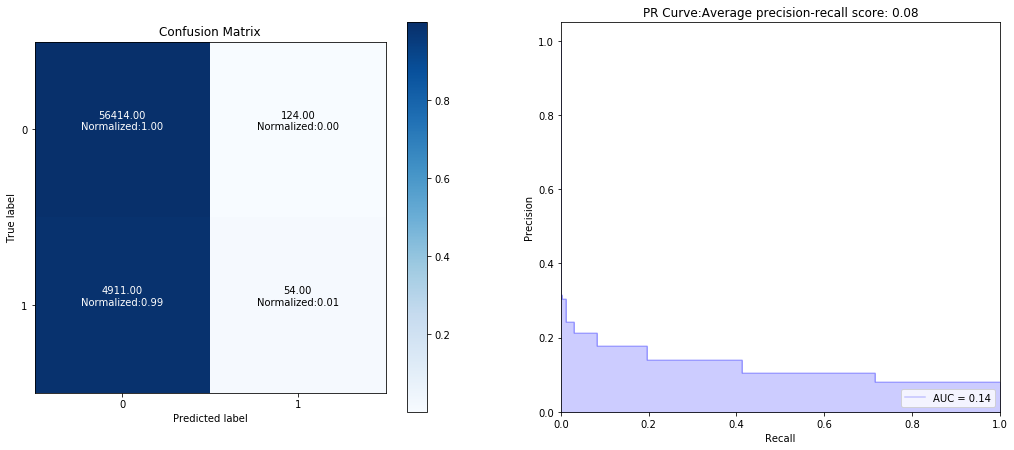

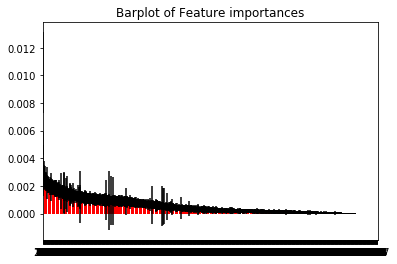

In [78]:
from sklearn.ensemble import RandomForestClassifier

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_norm, Y):
    X_train = X_norm[train_index]
    Y_train = Y[train_index]
    X_test = X_norm[test_index]
    Y_test = Y[test_index]
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train.ravel())
y_pred = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)
print("Log sampled Data - Random Forest Execution : ")
classification_evaluation(Y_test, y_pred, pred_prob)
feature_imp_plot(rfc, 'Random Forest Feature importance', 'Barplot of Feature importances', 
                 features)
generate_kaggle_output(rfc, X_test_kaggle_norm,
                       pd.DataFrame(df_kaggle_test.SK_ID_CURR), "randomForest_norm" )


***
### LightGBM, Light Gradient Boosting Machine
A gradient boosting framework that uses tree based learning algorithms. Experimental study on public datasets show that LightGBM can outperform existing boosting frameworks on both efficiency and accuracy, with significantly lower memory consumption. 

In [79]:
from lightgbm import LGBMClassifier

# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", 
                            ascending=False)[:40].index  # Select top 40 features
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's auc: 0.766783	valid_1's auc: 0.757022
[200]	valid_0's auc: 0.788987	valid_1's auc: 0.769512
[300]	valid_0's auc: 0.802436	valid_1's auc: 0.774555
[400]	valid_0's auc: 0.812735	valid_1's auc: 0.777255
[500]	valid_0's auc: 0.821247	valid_1's auc: 0.778917
[600]	valid_0's auc: 0.828598	valid_1's auc: 0.780008
[700]	valid_0's auc: 0.835026	valid_1's auc: 0.780674
[800]	valid_0's auc: 0.840976	valid_1's auc: 0.780777
[900]	valid_0's auc: 0.846726	valid_1's auc: 0.780986
[1000]	valid_0's auc: 0.852362	valid_1's auc: 0.781196
[1100]	valid_0's auc: 0.85743	valid_1's auc: 0.781134
[1200]	valid_0's auc: 0.862092	valid_1's auc: 0.781
Early stopping, best iteration is:
[1070]	valid_0's auc: 0.855748	valid_1's auc: 0.781228


/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     56538
          1       0.53      0.04      0.07      4965

avg / total       0.89      0.92      0.89     61503

Accuracy: 0.9196461961205145
Weighted F1 score: 0.886073088713986


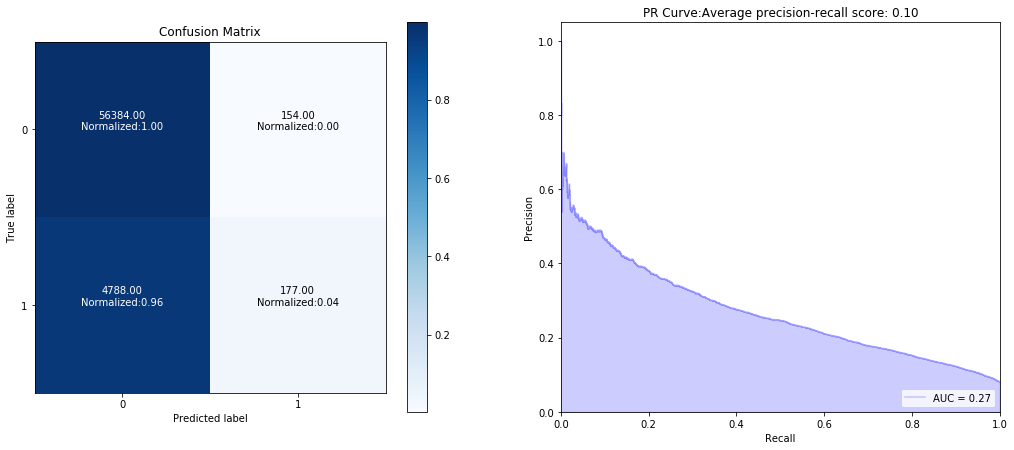

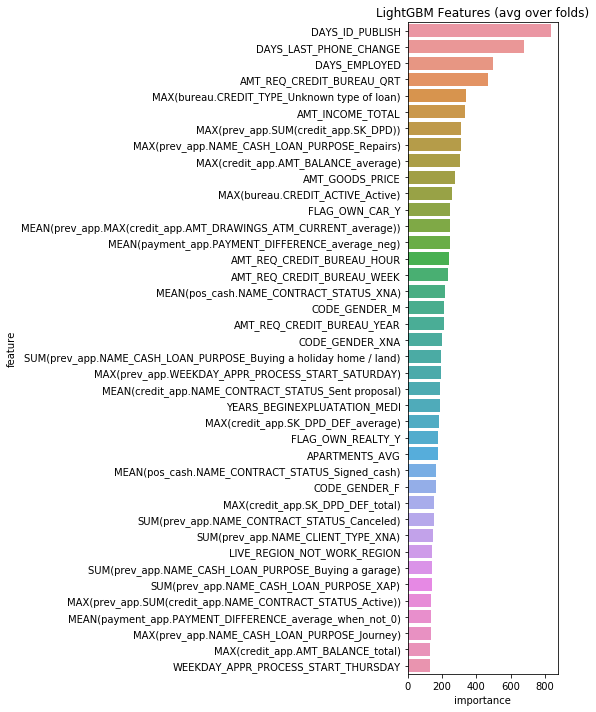

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [80]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_norm, Y):
    train_x = X_norm[train_index]
    train_y = Y[train_index].ravel()
    test_x = X_norm[test_index]
    test_y = Y[test_index].ravel()
    
    # LightGBM parameters 
    clf = LGBMClassifier(
        nthread=4,
        boosting_type = 'goss',
        n_estimators=10000,
        learning_rate=0.02,
        num_leaves=34,
        colsample_bytree=0.9497036,
        subsample=0.8715623,
        max_depth=8,
        reg_alpha=0.041545473,
        reg_lambda=0.0735294,
        min_split_gain=0.0222415,
        min_child_weight=39.3259775,
        silent=-1,
        verbose=-1, )

    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (test_x, test_y)], 
        eval_metric= 'auc', verbose= 100, early_stopping_rounds= 200)

    pred_prob = clf.predict_proba(test_x)
    predictions = clf.predict(test_x)
    

    feature_importance_df = pd.DataFrame()
    feature_importance_df["feature"] = np.setdiff1d(features, ['TARGET', 'SK_ID_CURR'])
    feature_importance_df["importance"] = clf.feature_importances_
    classification_evaluation(test_y, predictions, pred_prob)
    
    display_importances(feature_importance_df)
    
generate_kaggle_output(clf, X_test_kaggle_norm,
                       pd.DataFrame(df_kaggle_test.SK_ID_CURR), "LGBM_norm" )